In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.DataFrame([[2,20],[4,40],[8,80],[9,90]],
                   index=['해도','병관','기성','동원'],
                   columns=['시간','성적'])
data

,시간,성적
해도,2,20
병관,4,40
기성,8,80
동원,9,90


# 2. 수학 공식을 이용한 해석적 모델
- LinearRegression

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
linear_model = LinearRegression()
linear_model.fit(data[['시간']],data['성적'])

LinearRegression()

In [5]:
print('가중치 : ', linear_model.coef_)
print('절편 : ', linear_model.intercept_)

가중치 :  [10.]
절편 :  7.105427357601002e-15


In [6]:
linear_model.predict([[7]])

array([70.])

# 3. 경사하강법
- 가중치의 변화에 따른 비용함수 값의 변화 그래프

# 3.1 H(x)
- 예측함수
- H(x) = w * x + 0

In [7]:
def h(w , x):
    return w * x

# 3.2  비용 함수(Cost function)
- 평균제곱오차

In [8]:
# data : 예측에 활용하는 데이터
# target : 실제 데이터(정답)
# weight : 가중치
def cost(data, target, weight) :
    y_pre = h(weight, data)
    return ((y_pre - target) ** 2).mean()

In [9]:
cost(data['시간'], data['성적'], 10)

0.0

In [10]:
for m in range(-100, 100) :
    result = cost(data['시간'], data['성적'], m)
    print('{}일 때 가중치 : {}'.format(m, result))

-100일 때 가중치 : 499125.0
-99일 때 가중치 : 490091.25
-98일 때 가중치 : 481140.0
-97일 때 가중치 : 472271.25
-96일 때 가중치 : 463485.0
-95일 때 가중치 : 454781.25
-94일 때 가중치 : 446160.0
-93일 때 가중치 : 437621.25
-92일 때 가중치 : 429165.0
-91일 때 가중치 : 420791.25
-90일 때 가중치 : 412500.0
-89일 때 가중치 : 404291.25
-88일 때 가중치 : 396165.0
-87일 때 가중치 : 388121.25
-86일 때 가중치 : 380160.0
-85일 때 가중치 : 372281.25
-84일 때 가중치 : 364485.0
-83일 때 가중치 : 356771.25
-82일 때 가중치 : 349140.0
-81일 때 가중치 : 341591.25
-80일 때 가중치 : 334125.0
-79일 때 가중치 : 326741.25
-78일 때 가중치 : 319440.0
-77일 때 가중치 : 312221.25
-76일 때 가중치 : 305085.0
-75일 때 가중치 : 298031.25
-74일 때 가중치 : 291060.0
-73일 때 가중치 : 284171.25
-72일 때 가중치 : 277365.0
-71일 때 가중치 : 270641.25
-70일 때 가중치 : 264000.0
-69일 때 가중치 : 257441.25
-68일 때 가중치 : 250965.0
-67일 때 가중치 : 244571.25
-66일 때 가중치 : 238260.0
-65일 때 가중치 : 232031.25
-64일 때 가중치 : 225885.0
-63일 때 가중치 : 219821.25
-62일 때 가중치 : 213840.0
-61일 때 가중치 : 207941.25
-60일 때 가중치 : 202125.0
-59일 때 가중치 : 196391.25
-58일 때 가중치 : 190740.0
-57일 때 가중치 : 185171.25
-56일 때 가중

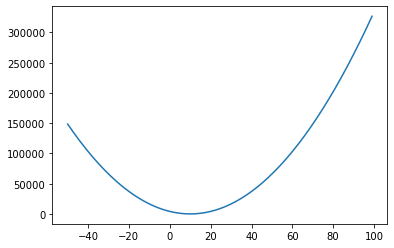

In [11]:
arr = range(-50, 100)

cost_list = []
for m in arr :
    result = cost(data['시간'], data['성적'], m)
    cost_list.append(result)
    
plt.plot(arr, cost_list)
plt.show()

# SGDRegressor
- 경사하강법을 활용한 모델

In [12]:
from sklearn.linear_model import SGDRegressor

In [13]:
sgd_model = SGDRegressor(max_iter = 500, #가중치 업데이트 횟수
                        eta0 = 0.01,     #학습률 (learing rate)
                        verbose = 1)     #학습 과정 확인
sgd_model.fit(data[['시간']], data['성적'])

-- Epoch 1
Norm: 9.15, NNZs: 1, Bias: 1.045654, T: 4, Avg. loss: 1039.046142
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 9.67, NNZs: 1, Bias: 1.116144, T: 8, Avg. loss: 5.939994
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 9.79, NNZs: 1, Bias: 1.126163, T: 12, Avg. loss: 0.559193
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 9.83, NNZs: 1, Bias: 1.128052, T: 16, Avg. loss: 0.181537
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 9.83, NNZs: 1, Bias: 1.123993, T: 20, Avg. loss: 0.138113
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 9.85, NNZs: 1, Bias: 1.121349, T: 24, Avg. loss: 0.137728
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 9.84, NNZs: 1, Bias: 1.116878, T: 28, Avg. loss: 0.131042
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 9.85, NNZs: 1, Bias: 1.114147, T: 32, Avg. loss: 0.131149
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 9.84, NNZs: 1, Bias: 1.109630, T: 36, Avg. loss: 0.127886
Total training time: 0.00 seconds.
-- Epoch 

SGDRegressor(max_iter=500, verbose=1)

In [14]:
print(sgd_model.coef_)
print(sgd_model.intercept_)

[9.86508674]
[0.97872615]
